In [1]:
import io
import requests
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split, cross_validate,
                                     GridSearchCV)
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, PrecisionRecallDisplay)

# Make notebook output stable across runs
random_state = 1
np.random.seed(random_state)

# Options for plots
%matplotlib inline
sns.set()
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelpad'] = 12

In [8]:
def is_odd(number):
    return number % 2 != 0

In [2]:
# Load data
url = 'https://raw.githubusercontent.com/natecraig/aiml/main/data/mnist_784_partial.csv'
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

X = df.iloc[:, :-1].to_numpy()
y = df['class'].to_numpy()

In [48]:
# Take random subset of data for quicker processing
sample = np.random.choice(X.shape[0], 5000)
X = X[sample]
y = y[sample]

In [57]:
# Split data into train and test data
(X_train, X_test,
 y_train, y_test) = train_test_split(X, y, test_size=0.2)

(1000, 784)

In [50]:
# Calculating the square root of samples to choose the maximum K and making sure K is an odd number to avoid ties.
numberK=np.sqrt(len(X_train))
is_odd((numberK))

np.True_

In [51]:
if numberK == True:
  max_range=np.int32(numberK)
else:
  max_range=np.int32(numberK+1)

## Problem Set 1
### My set up for this problem set 1
*   Using 5k sample
*   Using the length of the sqrt to find the highest k
*   Checking if k is an odd number



In [52]:
min_range = 1
max_range = max_range

parameters = {
    'n_neighbors': range(min_range, max_range, 2) # Step by 2 to only include odd numbers
}

knn_clf = KNeighborsClassifier()
grid_clf = GridSearchCV(knn_clf, param_grid=parameters,
                        scoring='accuracy')
grid_clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 64, 2)}, scoring='accuracy')

In [33]:
# Output the accuracy obtained from the grid search in the prior cell
print(f'Accuracy: {grid_clf.best_score_:.3f}')
grid_clf.best_params_

Accuracy: 0.980


{'n_neighbors': 1}

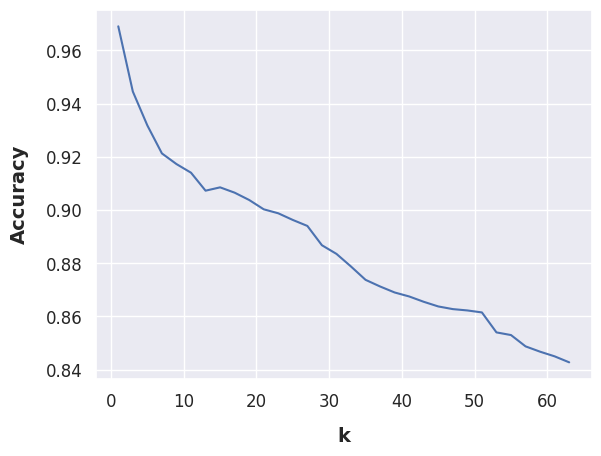

In [60]:
plt.plot(parameters['n_neighbors'],
         grid_clf.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [59]:
# Hint: calculate accuracy on the testing data by
# adjusting the BLANK placeholder

y_pred = grid_clf.predict(X_test)

# accuracy_score(y_test, y_pred
accuracy_score(y_test, y_pred)

0.993

### 1. Use automation to find a good value of 𝑘 for multiclass classification via cross-validation.

In [58]:
# Retrieve the best estimator (model) found by GridSearchCV
best_knn_model = grid_clf.best_estimator_

# Now, perform cross-validation on this best model.
# We'll use the training data (X_train, y_train) for this, as the test set (X_test, y_test)
# should ideally be reserved for a single, final evaluation.

# You can specify multiple scoring metrics if needed
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

cv_results = cross_validate(best_knn_model, X_train, y_train, cv=3, scoring=scoring)

print("Cross-validation results for the best KNN model:")
for metric in scoring:
    mean_score = cv_results[f'test_{metric}'].mean()
    print(f"  Mean {metric.replace('_weighted', '').capitalize()} (CV): {mean_score:.3f}")
    #std_score = cv_results[f'test_{metric}'].std()
   # print(f"  Mean {metric.replace('_weighted', '').capitalize()} (CV): {mean_score:.3f} (+/- {std_score:.3f})")

Cross-validation results for the best KNN model:
  Mean Accuracy (CV): 0.952
  Mean Precision (CV): 0.953
  Mean Recall (CV): 0.952
  Mean F1 (CV): 0.952


### 2. How would you measure the performance of the model you selected (i.e., the nearest-neighbors model with your value of 𝑘)? What is the value of your performance measure?

#### Ans: Evaluating a classifier is often trickier than evaluating a regressor. For classifiers accuracy is not the preferred performance measure, at least based on the book says. Thus, I decided to run the other two performance metrics for classifiers: Precision and Recall, and then ran F1-score that is a single metric to comapre two classifiers.

In [36]:
from sklearn.metrics import f1_score

In [61]:
prec=precision_score(y_test, y_pred, average='weighted')
rec=recall_score(y_test, y_pred, average='weighted')
f1=f1_score(y_test, y_pred, average='weighted')
print((f'The Precision score is: {prec:.4f}\n'
       f'The Recall score is: {rec:.4f}\n'
       f'The F1 score is: {f1:.4f}'))

The Precision score is: 0.9931
The Recall score is: 0.9930
The F1 score is: 0.9930


### 3. Would you expect your model to generalize to new instances similar to those from the MNIST handwritten digits database? Why or why not?

#### In order to check if the model generalizes to new instances, I decided to get another random sample of 10000 samples from the same dataset.

In [62]:
sample = np.random.choice(X.shape[0], 10000)
X1 = X[sample]
y1 = y[sample]

In [63]:
# You can specify multiple scoring metrics if needed
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

cv_results = cross_validate(best_knn_model, X1, y1, cv=3, scoring=scoring)

print("Cross-validation results for the best KNN model:")
for metric in scoring:
    mean_score = cv_results[f'test_{metric}'].mean()
    print(f"  Mean {metric.replace('_weighted', '').capitalize()} (CV): {mean_score:.3f}")

Cross-validation results for the best KNN model:
  Mean Accuracy (CV): 0.992
  Mean Precision (CV): 0.992
  Mean Recall (CV): 0.992
  Mean F1 (CV): 0.992


#### Based on the results above, it's possible to see that the model can generalize to new instances similar to those from the MNIST, even though it is still a random sample from the original dataset. This consistency between the new scores and the past scores, suggest that my model has learned the patterns and isn't simply memorizing the training data.

### 4.Describe two products you interact with regularly that likely employ supervised learning. One product should employ classification (i.e., a categorical label), and the other should apply regression (i.e., a numerical target). Discuss the relevant features and outcomes.

#### I used 3 different AIs to answer this question. I used Gemini 2.5, ChatGPT 5.2, and Perplexity.

* Gemini, Perplexity and ChatGPT gave me the same answer for a Classification example: Email Spam Filter.
* For the regression example: Gemini mentioned Ride-Sharing App fare Estimation, Perplexity mentioned House-price prediction in a real-state app, and ChatGpt said Ride-share ETA prediction.

#### I am going to use the Gemini example to answer this question.
* Classification: it uses binary classification, Spam or Not Spam. The relevant features considered are: Sender information (e.g: IP address, sender's domain), Email content (e.g: keywords and phrases commonly found in spam), Attachments (e.g: presence and type of attachments), Recipient Behavior (e.g: how other users interacted with similar email), Metadata (e.g: email size, time sent).

* Regression: it predicts a continuous numerical value. The relevant features are: Route information (e.g: pickup and drop-off locations), Estimated Travel Time (e.g: predicted duration of the trip), Time of the day (e.g: peak hours vs weekends), Traffic Conditions (e.g: historical traffic data), Weather, Supply and Demand (e.g: number of active riders and available drivers), and Historical Fare Data.

#### However, I decided to ask a follow up question, I wanted to dig deeper in what they would offer me, and for all of them I asked the same follow up question:
* "give me two new examples that people would not think about that."

#### These are the following answers:
* Gemini:
1.  Classification: Predictive Maintenance in
Manufacturing;
2.  Regression: Agricultural Crop Yield Forecasting.

* Perplexity:

1.   Classification: Document Scanner App (auto-tagging receipts)
2.   Regression: Fitness tracker estimating calories burned.

* ChatGPT:

1.   Classification: Credit-card “merchant clean-up” in personal finance apps
2.   Regression: Smartphone battery “time remaining” estimate.





### 5. Use generative AI to develop a plan for applying generative AI in your professional or personal life. You may start with the prompt below or use a prompt of your design. Address the following points:


1.   Describe one potential application of generative AI that you
believe to be promising.
2.   Assess the value of using generative AI to brainstorm further
uses of generative AI, i.e., what your experience is using the
prompt below.
3.   How might you improve the prompt below?



##### PROMPT: You are an experienced career and life coach that works with leading executives. I would like you to act as my thought partner by asking me one question at a time. My situation is: [provide the context]. Here’s what I’m trying to accomplish: [describe some of your broader goals]. Please help me think through potential uses of AI tools to help me achieve my goals. I’m most interested in advanced applications of AI that rely on the latest developments in the technology.

**My situation is:** personal finance is something that my parents have struggled for a long time, they are both enterpreneurs and they do not know where their money go with the products they sell. Their market is a local city in Brazil. I want to focus on my mom's business that has a great potential and it feels based on my calculations she makes a lot of profit but she doesn't see the money and she is always tight with money. Brazil has 14.6 million Individual Microentrepreneurs (MEI).

**Here's what I'm trying to accomplish:** I want to create an app and web version, where someone like my parents can scan their receipts and this app will detect where it asks what product the microenterpreneurs will use for and gives in the first page a summary of the total spent for that product per week and then gives the price/unit and how much of that product this person can make out of that.

#### Answers
* I. One potential application of Gen AI that I believe to be promising is to use Gen AI to do the tedious work of coding an APP. Another one that was cool to see and I saw on linkedln was about this company using LLM to create new DNA sequences, they want to use LLM to create medicines tailored based on your DNA in the future.

* II. The problem with the prompt below is that it spills so much information that it's hard to follow, and I get overwhelmed. It did give me things to think about that I was not thinking but because it gives so much information, it actually makes me to get lost in the information and lose focus.

* III. I think I would add a sentence saying: "Ask me to add a new topic related to the answer before moving on with the answer."